# Importing data

In [6]:
# Input file location and name
input_file = r"C:\Users\PINAKI\Desktop\upgrad\LendingCLub\loan.csv"

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [8]:
# Reading in the loan file and inspecting its shape
loan = pd.read_csv(input_file, low_memory=False)
print("Rows: %d, Columns: %d" % (loan.shape[0], loan.shape[1]))

Rows: 39717, Columns: 111


# Filtering Rows and Columns

In [10]:
# Dropping columns which are completely empty
loan = loan.dropna(axis='columns', how='all')
loan.shape
print(loan.head(5))

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade    ...    next_pymnt_d  \
0   10.65%       162.87     B        B2    ...             NaN   
1   15.27%        59.83     C        C4    ...             NaN   
2   15.96%        84.33     C        C5    ...             NaN   
3   13.49%       339.31     C        C1    ...             NaN   
4   12.69%        67.79     B        B5    ...          Jun-16   

  last_credit_pull_d collections_12_mths_ex_med  policy_code application_type  \
0             May-16                        0.0      

In [12]:
# The following columns only have 0s in them
# cols initial_list_status, application_type have only one value
empty_columns = ['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 
                 'delinq_amnt', 'tax_liens', 'initial_list_status', 'application_type']
loan = loan.drop(empty_columns, axis='columns')
loan.shape

KeyError: "['collections_12_mths_ex_med' 'acc_now_delinq' 'chargeoff_within_12_mths'\n 'delinq_amnt' 'tax_liens' 'initial_list_status' 'application_type'] not found in axis"

In [13]:
# The following fields will have entries only when the loan is
# defaulted, so removing them
# Some columns like 'next_pymnt_d' is applicable only to 'current'
# loan_status
irrel_columns = ['recoveries', 'collection_recovery_fee', 'out_prncp', 'out_prncp_inv', 
                 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                 'next_pymnt_d', 'url']
loan = loan.drop(irrel_columns, axis='columns')
loan.shape

(39717, 40)

In [14]:
# Removing 'Current' rows from the dataset since it is not possible to know 
# if they will default in the future
loan = loan[~(loan['loan_status'] == 'Current')]
loan.shape

(38577, 40)

In [15]:
# Also dropping member_id, since there are no repeating members
# and id will play the primary key
loan = loan.drop('member_id', axis='columns')
loan.shape

(38577, 39)

In [16]:
print(loan.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'total_rec_late_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'policy_code', 'pub_rec_bankruptcies'],
      dtype='object')


# Type conversions

In [0]:
# Converting int_rate to integer
loan['int_rate'] = pd.to_numeric(loan['int_rate'].str[:-1])
loan['int_rate'].dtype

dtype('float64')

In [0]:
# Parsing all datetime columns
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
loan[date_columns] = loan[date_columns].apply(pd.to_datetime, format="%b-%y")
loan[date_columns].dtypes

issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object

In [0]:
# list of categorical columns
cat_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
              'verification_status', 'loan_status', 'pymnt_plan',
              'purpose', 'zip_code', 'addr_state']
loan[cat_columns] = loan[cat_columns].apply(lambda x: x.astype('category'))
loan[cat_columns].dtypes

grade                  category
sub_grade              category
emp_length             category
home_ownership         category
verification_status    category
loan_status            category
pymnt_plan             category
purpose                category
zip_code               category
addr_state             category
dtype: object

In [19]:
loan.describe(percentiles=[.05,.25,.70,.95])

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,total_rec_late_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies
count,3.857700e+04,38577.000000,38577.000000,38577.000000,38577.000000,3.857700e+04,38577.000000,38577.000000,38577.000000,13672.000000,2740.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.000000,38577.0,37880.000000
mean,6.763787e+05,11047.025430,10784.058506,10222.481123,322.466318,6.877797e+04,13.272727,0.146668,0.871737,35.882534,69.260949,9.275423,0.055422,13289.489826,22.052648,1.368634,2746.243218,1.0,0.043479
std,2.092639e+05,7348.441646,7090.306027,7022.720644,208.639215,6.421868e+04,6.673044,0.492271,1.071546,22.028093,43.987761,4.401588,0.237804,15866.492241,11.425861,7.315880,4494.648131,0.0,0.204583
min,5.473400e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.0,0.000000
5%,3.710014e+05,2400.000000,2400.000000,1800.000000,70.610000,2.400000e+04,2.100000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,312.000000,7.000000,0.000000,41.756000,1.0,0.000000
25%,5.120330e+05,5300.000000,5200.000000,5000.000000,165.740000,4.000000e+04,8.130000,0.000000,0.000000,18.000000,19.750000,6.000000,0.000000,3650.000000,13.000000,0.000000,217.420000,1.0,0.000000
50%,6.564230e+05,9600.000000,9550.000000,8733.440000,277.860000,5.886800e+04,13.370000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8762.000000,20.000000,0.000000,568.260000,1.0,0.000000
70%,7.937528e+05,14000.000000,13000.000000,12150.000000,386.974000,7.500000e+04,17.430000,0.000000,1.000000,47.000000,101.000000,11.000000,0.000000,14729.400000,27.000000,0.000000,2518.128000,1.0,0.000000
95%,1.038337e+06,25000.000000,25000.000000,24500.066590,760.820000,1.400040e+05,23.800000,1.000000,3.000000,75.000000,115.000000,17.000000,1.000000,41356.200000,43.000000,14.930474,12370.088000,1.0,0.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,90.000000,180.200000,36115.200000,1.0,2.000000


# Derived columns creation

# Imputation

# Univariate

## Interest Rate

In [0]:
loan['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

## Grade

In [0]:
# Grade has 7 levels wiht no NAs
loan['grade'].describe()

count     38577
unique        7
top           B
freq      11675
Name: grade, dtype: object

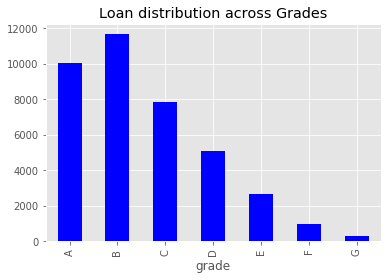

In [0]:
# loans for the grades are unequally distributed
loan.groupby('grade')['id'].count().plot(kind='bar', color='blue')
plt.title('Loan distribution across Grades')
plt.show()

## Sub Grade

In [0]:
# No NAs, 5 levels within each Grade
loan['sub_grade'].describe()

count     38577
unique       35
top          A4
freq       2873
Name: sub_grade, dtype: object

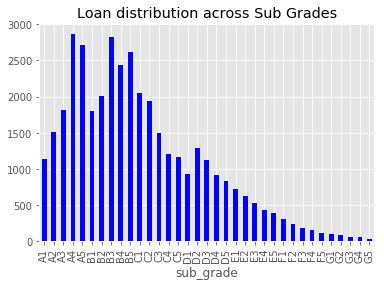

In [17]:
# loans for the grades are unequally distributed
loan.groupby('sub_grade')['id'].count().plot(kind='bar', color='blue')
plt.title('Loan distribution across Sub Grades')
plt.show()

# Univariate Segmented

# Bivariate

## Interest Rate vs Loan Status
**Hypothesis:** Charged Off loans will have higher interest rates than Paid Off loans

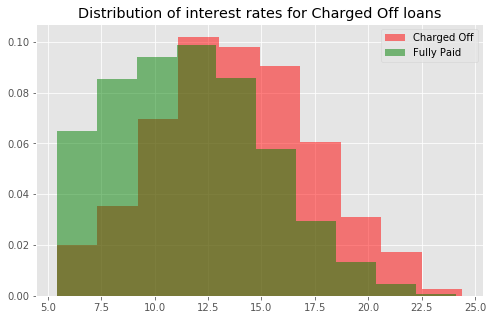

In [0]:
interest_status = loan[loan['loan_status'] == 'Charged Off']['int_rate']
interest_status.hist(alpha=0.5, density=True, figsize=(8, 5), color='red')
interest_status = loan[loan['loan_status'] == 'Fully Paid']['int_rate']
interest_status.hist(alpha=0.5, density=True, figsize=(8, 5), color='green')
plt.title('Distribution of interest rates for Charged Off loans')
plt.legend(('Charged Off', 'Fully Paid'))
plt.show()

## Grade vs Loan Status
**Hypothesis:** For lower grades the risk of default is higher

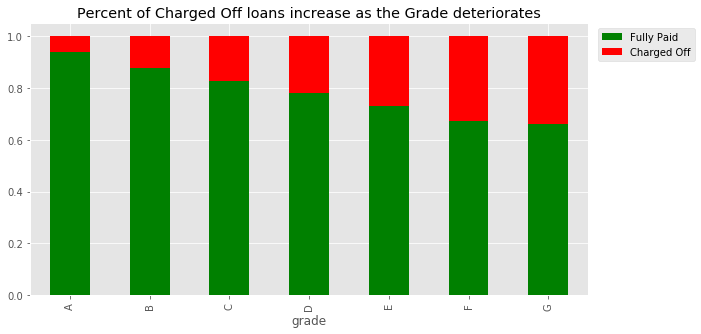

In [0]:
# Calculating the number of loan_status' across different grades
status_grade = loan.groupby(['grade', 'loan_status'])['id'].count().reset_index()
status_grade = status_grade.pivot_table(index='grade', columns='loan_status', values='id')
# Preparation to create the stacked bar plot
total = status_grade['Fully Paid']+status_grade['Charged Off']
status_grade['Fully Paid'] = status_grade['Fully Paid']/total
status_grade['Charged Off'] = status_grade['Charged Off']/total
plt.figure(figsize=(10,5))
status_grade['Fully Paid'].plot(kind='bar', color='green', label='Fully Paid')
status_grade['Charged Off'].plot(kind='bar', bottom=status_grade['Fully Paid'], color='red', label='Charged Off')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.title('Percent of Charged Off loans increase as the Grade deteriorates')
plt.show()

## Sub Grade vs Loan Status
**Hypothesis:** Within each grade the risk of default increases with increasing levels

### Charged Off loans count across Sub Grades

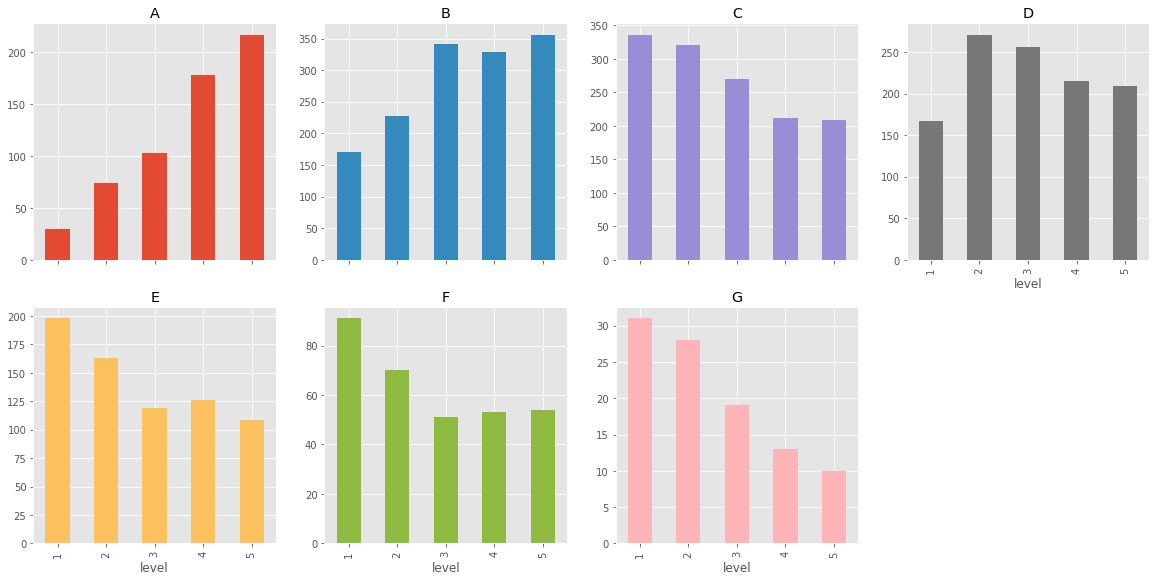

In [0]:
# Filtering only Charged Off rows and counting them across different sub grades
status_sub_grade = loan[loan['loan_status'] == 'Charged Off'].groupby('sub_grade')['id'].count().reset_index()
# Preparation for plot
status_sub_grade['grade'] = status_sub_grade['sub_grade'].str[0]
status_sub_grade['level'] = status_sub_grade['sub_grade'].str[1]
status_sub_grade = status_sub_grade.pivot_table(index='level', columns='grade', values='id')
status_sub_grade.plot(kind='bar', subplots=True, layout=(4, 4), figsize=(20, 20), legend=False)
# plt.title('Charged Off loans count across different levels within each Grade')
plt.show()

### Fully Paid loans count across Sub Grades

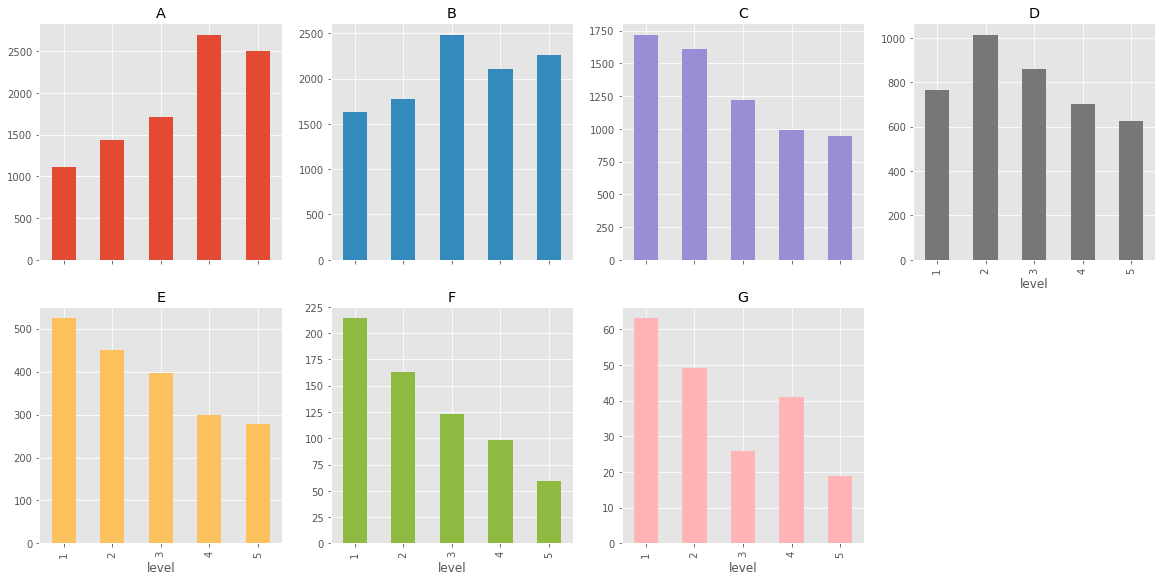

In [0]:
# Filtering only Charged Off rows and counting them across different sub grades
status_sub_grade = loan[loan['loan_status'] == 'Fully Paid'].groupby('sub_grade')['id'].count().reset_index()
# Preparation for plot
status_sub_grade['grade'] = status_sub_grade['sub_grade'].str[0]
status_sub_grade['level'] = status_sub_grade['sub_grade'].str[1]
status_sub_grade = status_sub_grade.pivot_table(index='level', columns='grade', values='id')
status_sub_grade.plot(kind='bar', subplots=True, layout=(4, 4), figsize=(20, 20), legend=False)
# plt.title('Charged Off loans count across different levels within each Grade')
plt.show()

# home ownership vs loan status

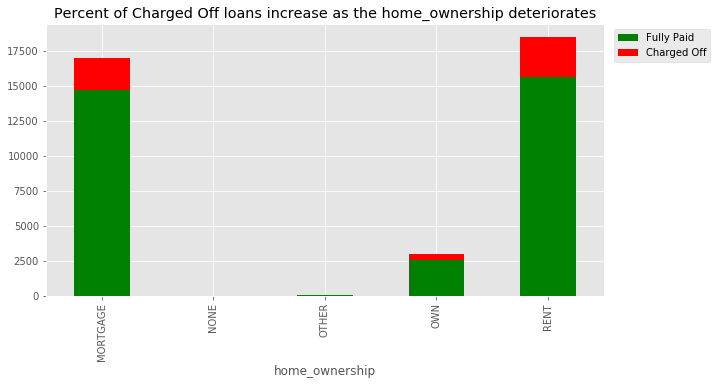

In [27]:
# Calculating the number of loan_status' across different home_ownerships
status_home_ownership = loan.groupby(['home_ownership', 'loan_status'])['id'].count().reset_index()
status_home_ownership = status_home_ownership.pivot_table(index='home_ownership', columns='loan_status', values='id')
# Preparation to create the stacked bar plot
total = status_home_ownership['Fully Paid']+status_home_ownership['Charged Off']
#status_home_ownership['Fully Paid'] = status_home_ownership['Fully Paid']/total
#status_home_ownership['Charged Off'] = status_home_ownership['Charged Off']/total
plt.figure(figsize=(10,5))
status_home_ownership['Fully Paid'].plot(kind='bar', color='green', label='Fully Paid')
status_home_ownership['Charged Off'].plot(kind='bar', bottom=status_home_ownership['Fully Paid'], color='red', label='Charged Off')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
plt.title('Percent of Charged Off loans increase as the home_ownership deteriorates')
plt.show()

In [24]:
cat_columns = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
              'verification_status', 'loan_status', 'pymnt_plan',
              'purpose', 'zip_code', 'addr_state']
loan[cat_columns].describe()

,grade,sub_grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,purpose,zip_code,addr_state
count,38577,38577,37544,38577,38577,38577,38577,38577,38577,38577
unique,7,35,11,5,3,2,1,14,822,50
top,B,A4,10+ years,RENT,Not Verified,Fully Paid,n,debt_consolidation,100xx,CA
freq,11675,2873,8488,18480,16694,32950,38577,18055,583,6949


In [31]:
# Calculating the number of loan_status' across different verification_statuss
status_verification_status = loan.groupby(['verification_status', 'loan_status'])['id'].count().reset_index()
status_verification_status = status_verification_status.pivot_table(index='verification_status', columns='loan_status', values='id')
print(status_verification_status)
# Preparation to create the stacked bar plot
#total = status_verification_status['Fully Paid']+status_verification_status['Charged Off']
#status_verification_status['Fully Paid'] = status_verification_status['Fully Paid']/total
#status_verification_status['Charged Off'] = status_verification_status['Charged Off']/total
#plt.figure(figsize=(10,5))
#status_verification_status['Fully Paid'].plot(kind='bar', color='green', label='Fully Paid')
#status_verification_status['Charged Off'].plot(kind='bar', bottom=status_verification_status['Fully Paid'], color='red', label='Charged Off')
#plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
#plt.title('Percent of Charged Off loans increase as the verification_status deteriorates')
#plt.show()

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified                2142       14552
Source Verified             1434        8243
Verified                    2051       10155


In [30]:
# Calculating the number of loan_status' across different purposes
status_purpose = loan.groupby(['purpose', 'loan_status'])['id'].count().reset_index()
status_purpose = status_purpose.pivot_table(index='purpose', columns='loan_status', values='id')
print(status_purpose)
# Preparation to create the stacked bar plot
#total = status_purpose['Fully Paid']+status_purpose['Charged Off']
#status_purpose['Fully Paid'] = status_purpose['Fully Paid']/total
#status_purpose['Charged Off'] = status_purpose['Charged Off']/total
#plt.figure(figsize=(10,5))
#status_purpose['Fully Paid'].plot(kind='bar', color='green', label='Fully Paid')
#status_purpose['Charged Off'].plot(kind='bar', bottom=status_purpose['Fully Paid'], color='red', label='Charged Off')
#plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
#plt.title('Percent of Charged Off loans increase as the purpose deteriorates')
#plt.show()

loan_status         Charged Off  Fully Paid
purpose                                    
car                         160        1339
credit_card                 542        4485
debt_consolidation         2767       15288
educational                  56         269
home_improvement            347        2528
house                        59         308
major_purchase              222        1928
medical                     106         575
moving                       92         484
other                       633        3232
renewable_energy             19          83
small_business              475        1279
vacation                     53         322
wedding                      96         830


In [32]:
loan.pub_rec_bankruptcies.describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [33]:
status_purpose = loan.groupby(['pub_rec_bankruptcies', 'loan_status'])['id'].count().reset_index()
status_purpose = status_purpose.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', values='id')
print(status_purpose)

loan_status           Charged Off  Fully Paid
pub_rec_bankruptcies                         
0.0                          5141       31097
1.0                           366        1271
2.0                             2           3


In [67]:
#loan.drop(loan.index[0])
print(loan['annual_inc'])

0         24000.00
1         30000.00
2         12252.00
3         49200.00
5         36000.00
6         47004.00
7         48000.00
8         40000.00
9         15000.00
10        72000.00
11        75000.00
12        30000.00
13        15000.00
14       100000.00
15        28000.00
16        42000.00
17       110000.00
18        84000.00
19        77385.19
20        43370.00
21       105000.00
22        50000.00
23        50000.00
24        76000.00
25        92000.00
26        60000.00
27        50004.00
28       106000.00
29        25000.00
30        17108.00
           ...    
39687     75000.00
39688    145000.00
39689     20000.00
39690     60000.00
39691     52200.00
39692    250000.00
39693     13500.00
39694    150000.00
39695     95000.00
39696     48000.00
39697     27376.00
39698     73000.00
39699     32000.00
39700      8000.00
39701     74000.00
39702     30000.00
39703    200000.00
39704     25000.00
39705    120000.00
39706    180000.00
39707    180000.00
39708     48

In [59]:
loan['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [83]:
#Bracket for annual income
bins = [0, 44500, 65000]
names = ['Low', 'Mid', 'High']

d = dict(enumerate(names, 1))

loan['incrange'] = np.vectorize(d.get)(np.digitize(loan['annual_inc'], bins))



In [90]:
#Bracket for loan amount
bins = [0, 6000, 11200]
names = ['Low', 'Mid', 'High']

d = dict(enumerate(names, 1))

loan['loanrange'] = np.vectorize(d.get)(np.digitize(loan['loan_amnt'], bins))

In [89]:
loan['incrange'].head(5)

0    high
1    high
2    high
3    high
5    high
Name: incrange, dtype: object

loan_status  Charged Off  Fully Paid
incrange                            
high                5594       32851
low                    2           9
mid                   31          90


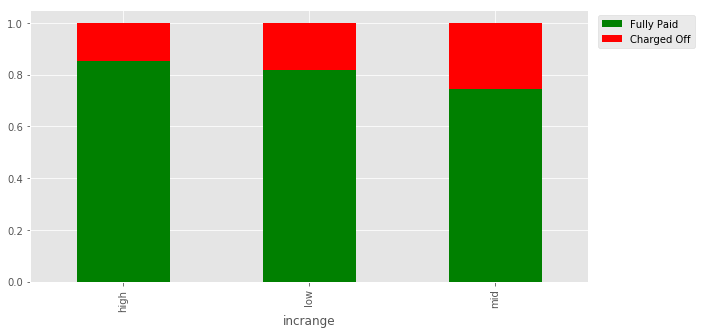

In [93]:
# Calculating the number of loan_status' across different incranges
status_incrange = loan.groupby(['incrange', 'loan_status'])['id'].count().reset_index()
status_incrange = status_incrange.pivot_table(index='incrange', columns='loan_status', values='id')
print(status_incrange)
# Preparation to create the stacked bar plot
total = status_incrange['Fully Paid']+status_incrange['Charged Off']
status_incrange['Fully Paid'] = status_incrange['Fully Paid']/total
status_incrange['Charged Off'] = status_incrange['Charged Off']/total
plt.figure(figsize=(10,5))
status_incrange['Fully Paid'].plot(kind='bar', color='green', label='Fully Paid')
status_incrange['Charged Off'].plot(kind='bar', bottom=status_incrange['Fully Paid'], color='red', label='Charged Off')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
#plt.title('Percent of Charged Off loans increase as the incrange deteriorates')
plt.show()


In [80]:
loan['annual_inc'].describe(percentiles=[.05,.30,.60,.95])

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
5%       2.400000e+04
30%      4.450000e+04
50%      5.886800e+04
60%      6.500400e+04
95%      1.400040e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [87]:
loan['loan_amnt'].describe(percentiles=[.05,.30,.60,.95])


count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
5%        2400.000000
30%       6000.000000
50%       9600.000000
60%      11200.000000
95%      25000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

loan_status  Charged Off  Fully Paid
loanrange                           
high                2569       12891
low                 1431        8983
mid                 1627       11076


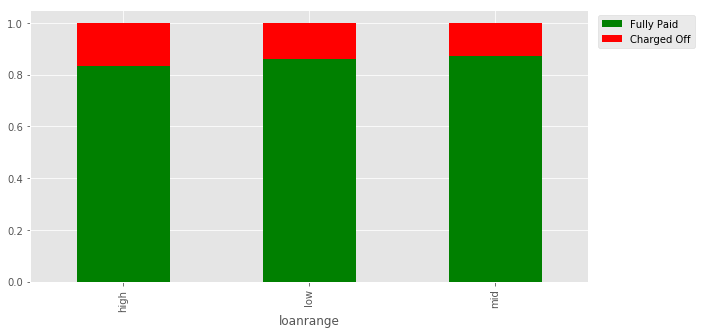

In [92]:
# Calculating the number of loan_status' across different loanranges
status_loanrange = loan.groupby(['loanrange', 'loan_status'])['id'].count().reset_index()
status_loanrange = status_loanrange.pivot_table(index='loanrange', columns='loan_status', values='id')
print(status_loanrange)
# Preparation to create the stacked bar plot
total = status_loanrange['Fully Paid']+status_loanrange['Charged Off']
status_loanrange['Fully Paid'] = status_loanrange['Fully Paid']/total
status_loanrange['Charged Off'] = status_loanrange['Charged Off']/total
plt.figure(figsize=(10,5))
status_loanrange['Fully Paid'].plot(kind='bar', color='green', label='Fully Paid')
status_loanrange['Charged Off'].plot(kind='bar', bottom=status_loanrange['Fully Paid'], color='red', label='Charged Off')
plt.legend(loc='upper right', bbox_to_anchor=(1.20,1))
#plt.title('Percent of Charged Off loans increase as the loanrange deteriorates')
plt.show()

In [ ]:
verification_status